# Run & display stats

In [1]:
import gc
import os
import datetime
import numpy as np
from tqdm.notebook import tqdm

from sim import FunctionType, Simulation, StaticSimulation, SimulationResults, LinearRandSimulation, LinearRandSimulationStatic, LongstepRandSimulation, LongstepRandSimulationStatic, SimulationEnsemble
from graph import GraphType, RocGraph
from rw_utils import pickle_obj
from db import SimulationDatabase, SimulationDirectory

In [2]:
num_nodes = 25
nums_edges = [54]
graph_types = [GraphType.roc]

# (GraphType, num_edges): Graph
graphs = {
    # (GraphType.complete, 4950): (CompleteGraph, {'num_nodes': num_nodes}),
    (GraphType.roc, 54): (RocGraph, {'num_cliques': 5, 'clique_size': 5})
}

# (FunctionType, static): Simulation
simulations = {
    (FunctionType.linear, True): LinearRandSimulationStatic
}

In [3]:
num_runs = 1
params = {
    'graph': None,
    'eps': 0.1,
    'beta_0': 0.055,
    'beta_1': 0.050,
    'alpha_0': 0.0,
    'alpha_1': 0.0,
    'max_num_iter': 150_000
}

## Run

Careful with parameters for `Longstep, RocGraph(4x25)` and `Longstep, RingGraph(100,24)`.

In [4]:
for (graph_type, num_edges), (graph_class, graph_params) in graphs.items():
    for (func_type, static), simulation_class in simulations.items():
        params['graph'] = graph_class(**graph_params)
        sim = simulation_class(**params)
        sim_ensemble = SimulationEnsemble(sim, num_runs)
        sim_ensemble.run()

Инициализация states:  [False  True False False False False False False False False False  True
 False False False False  True False False False False  True False False
 False]
Static инициализация:  [False  True False False False False False False False False False  True
 False False False False  True False False False False  True False False
 False]


LinearSimulationStatic on roc(k=5,l=5) (55 edges): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1003.66it/s]

Инициализация states:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Static инициализация:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


## Display stats

In [69]:
sdb = SimulationDatabase(path='output')
for (graph_type, num_edges), (_, graph_params) in graphs.items():
    for (func_type, static), _ in simulations.items():
        sdirs = [
            sdir
            for sdir in sdb.sdirs
            if (sdir.sim.func_type == func_type) and
            (static is isinstance(sdir.sim, StaticSimulation)) and
            (num_edges - 70 <= sdir.sim.graph.graph.number_of_edges() <= num_edges + 70) and
            (sdir.sim.graph.graph_type == graph_type)
        ]
        if len(sdirs) != 1:
            raise RuntimeError(f"Found {len(sdirs)} SimulationDirectories after filter. Expected 1.")
        sdir = sdirs[0]
        
        sdir.cache()
        sdir.info()
        del sdir
        gc.collect()

SimulationDirectory for LinearSimulationStatic on roc(k=5,l=5), 55 edges (1 runs)
E[t|~A] = None
E[t|A] = 619.0
tmax = 619


# Plot & animate

In [6]:
import os
import gc
import numpy as np
from matplotlib import pyplot as plt

from sim import FunctionType, StaticSimulation, FunctionType
from graph import GraphType, RocGraph
from plot import SigmaPlot
from db import SimulationDatabase, SimulationDirectory
from utils import sigma_mean, sigmas, pad
from rw_utils import read_pickled, deserialize_boolean_array
from animate import animate

%matplotlib inline

In [26]:
color = {
    GraphType.roc: 'green'
}

x_right = {
    FunctionType.linear: 2500
}

label = {
    GraphType.roc: 'кольцо клик'
}

## Plot all

linear_e55.png:
caching SimulationDirectory for LinearSimulation on roc(k=5,l=5), 55 edges (5 runs)...



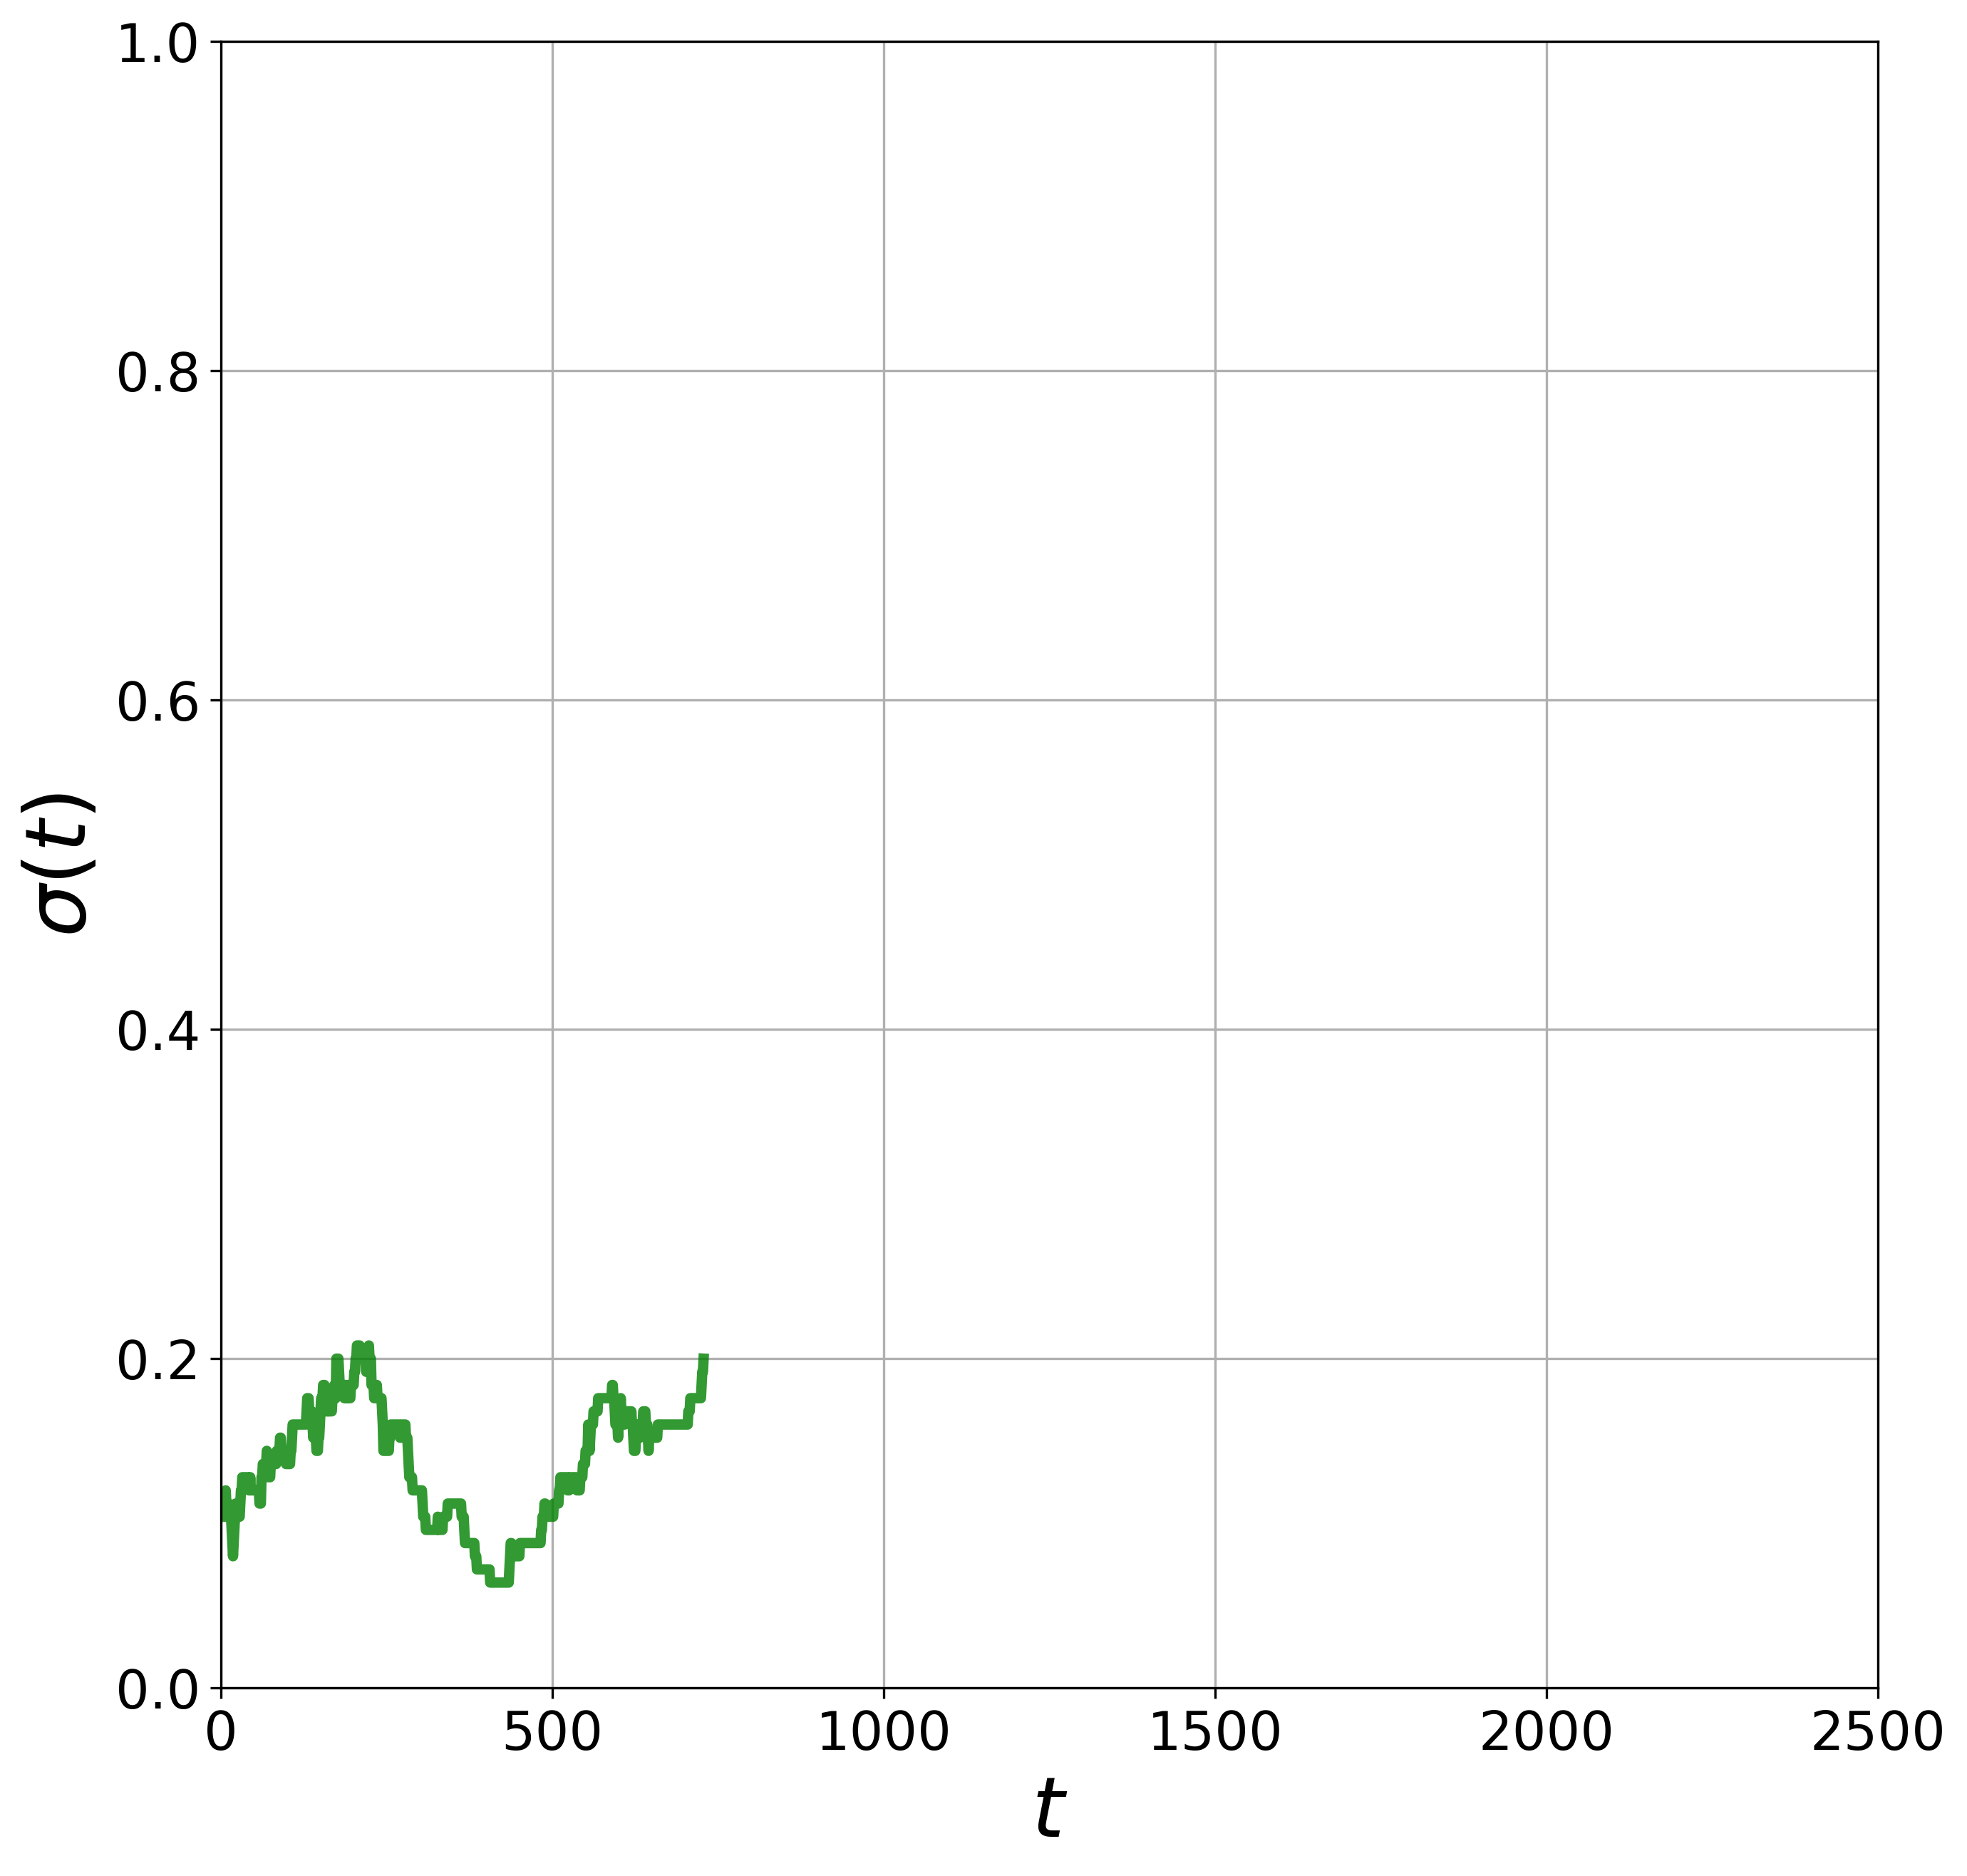

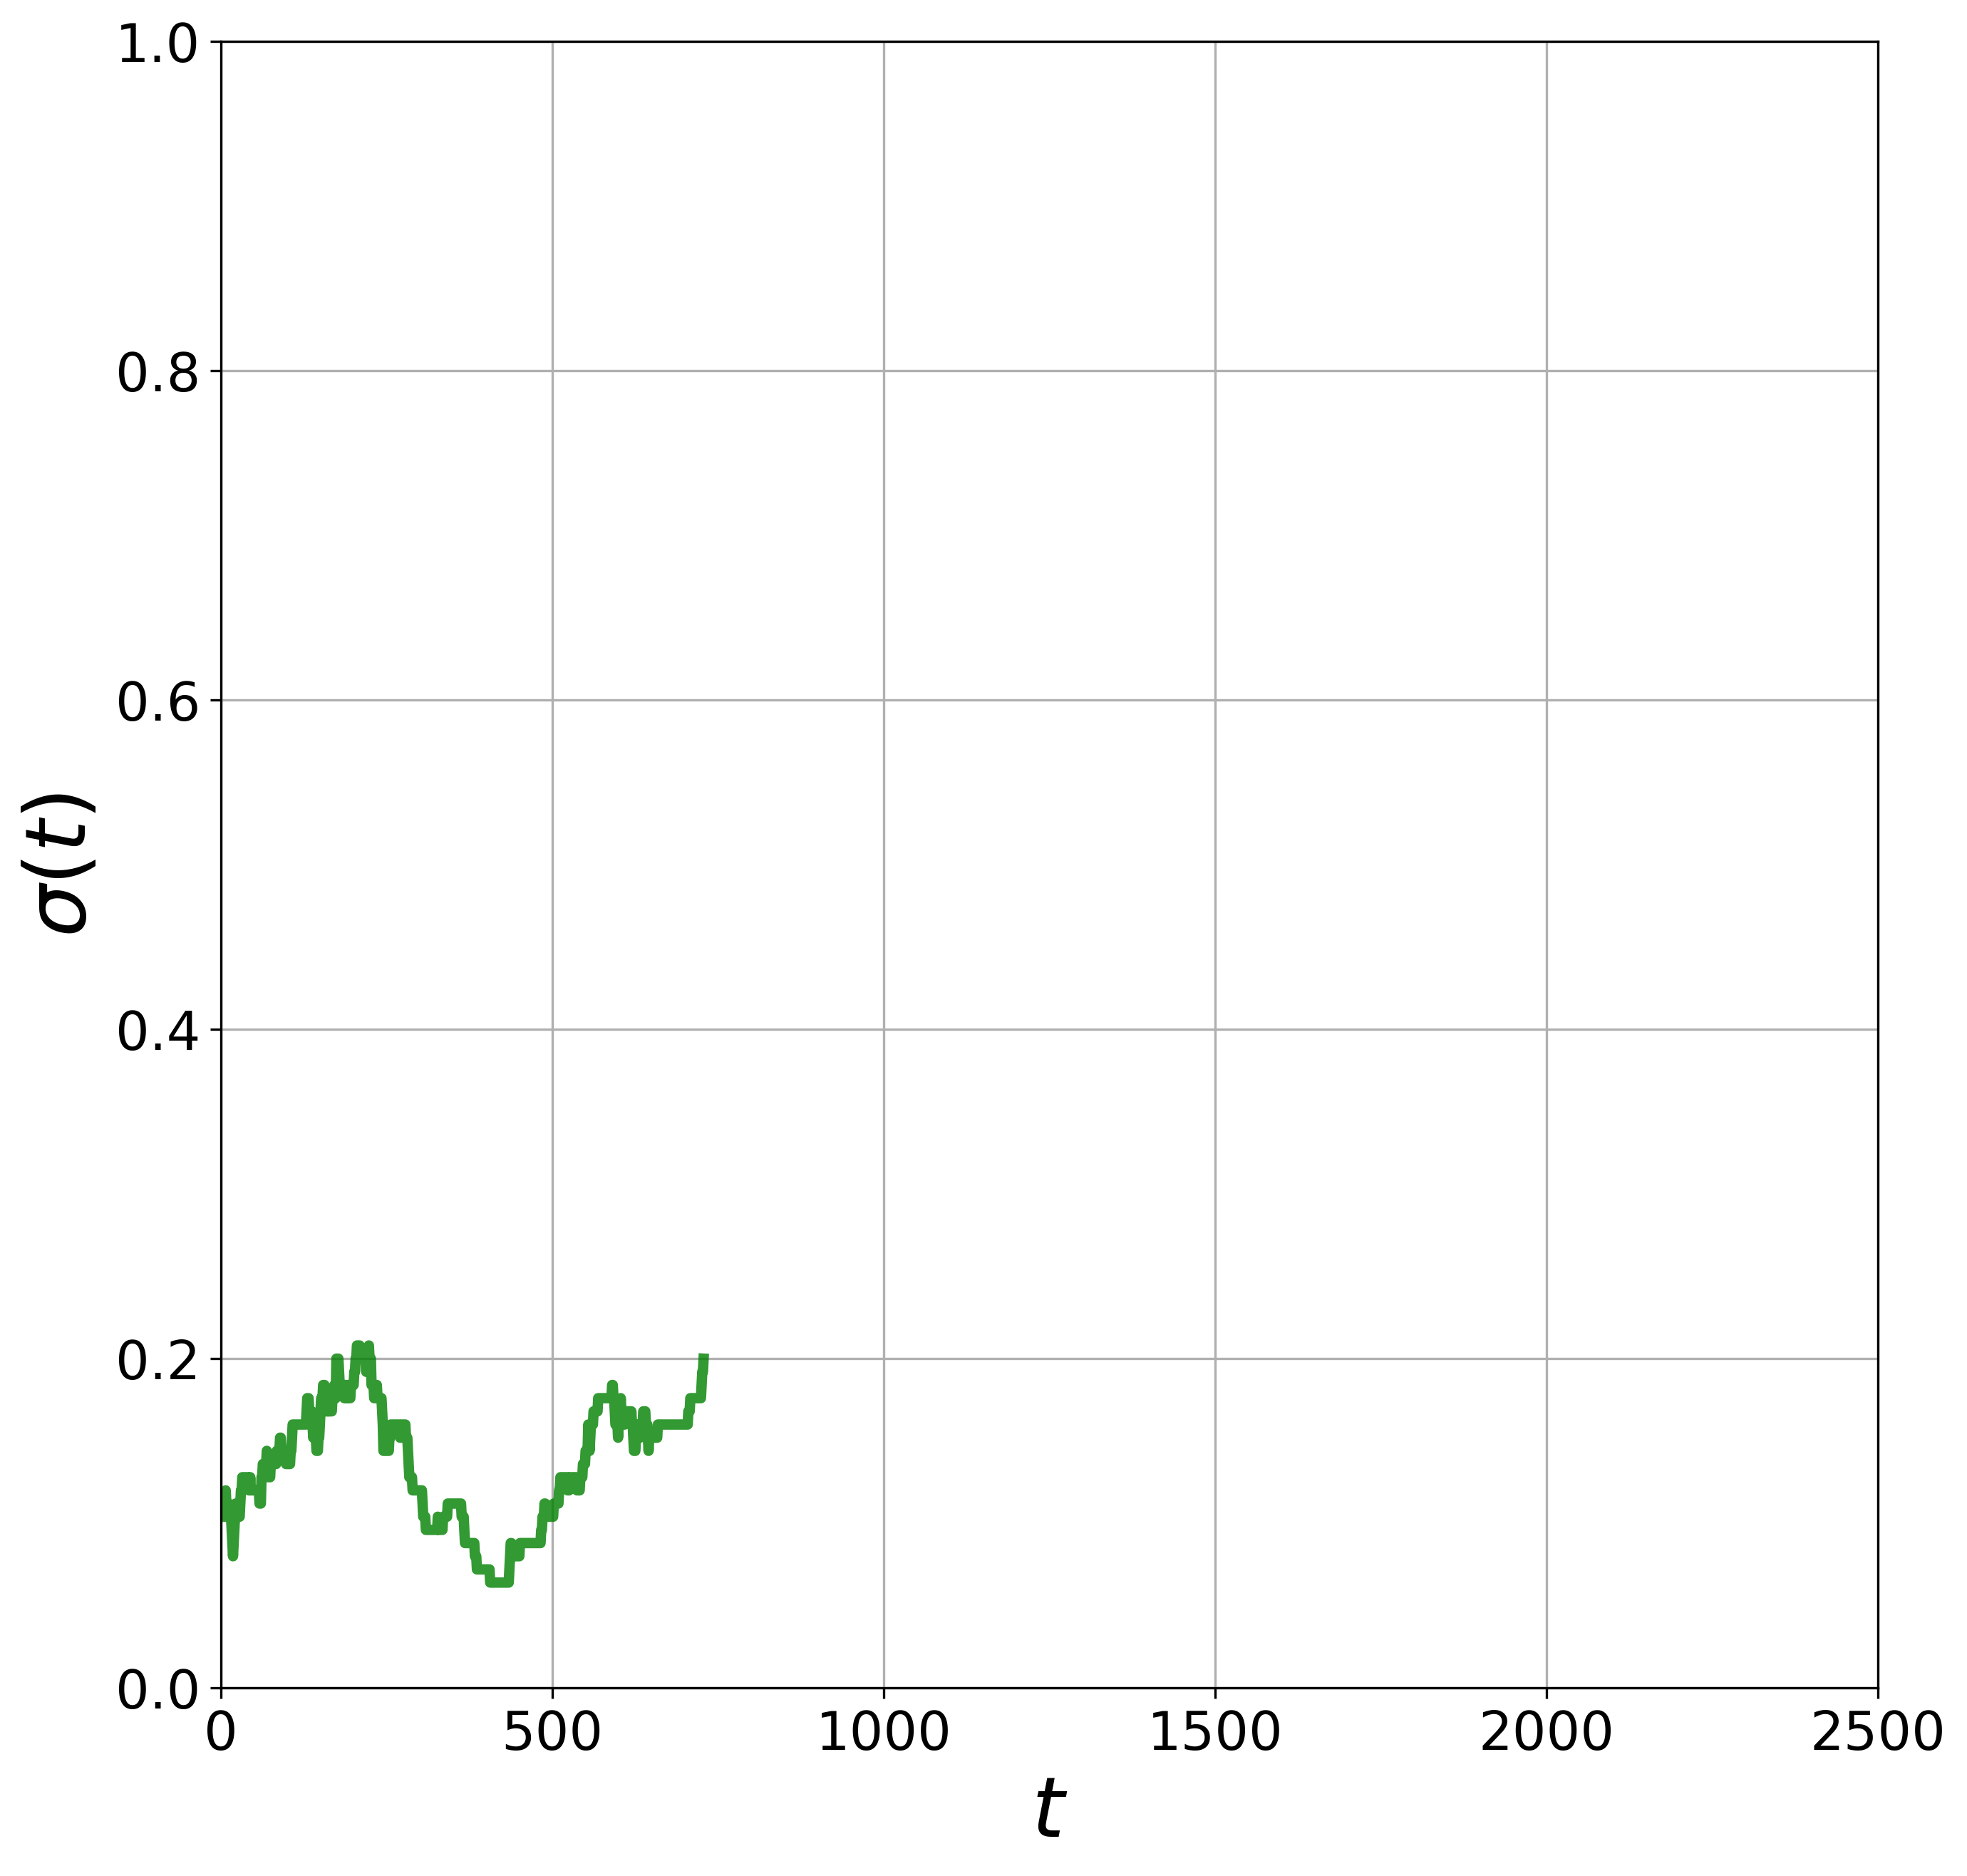

In [27]:
statics = [
    True
]

func_types = [
    FunctionType.linear
]

nums_edges = [
    54
]

sdb = SimulationDatabase(path='output')
for static in statics:
    for func_type in func_types:
        for num_edges in nums_edges:
            
            sdirs = [
                sdir
                for sdir in sdb.sdirs
                if (sdir.sim.func_type == func_type) and
                (static is isinstance(sdir.sim, StaticSimulation)) and
                (num_edges - 70 <= sdir.sim.graph.graph.number_of_edges() <= num_edges + 70) and
                (sdir.sim.graph.graph_type != GraphType.complete)
            ]
            if len(sdirs) != 1:
                raise RuntimeError(f"Expected 3 SimulationDirectories after filter, got {len(sdirs)}.")
            
            sim = sdirs[0].sim
            fname = f"{sim.func_type}_e{sim.graph.graph.number_of_edges()}" + "_static" * static + ".png"
            print(f"{fname}:")
            splot = SigmaPlot(linewidth=3.5, alpha=.8, ax_tick_size=18, ax_label_size=28)
            
            gc.collect()
            
            for sdir in sdirs:
                print(f'caching {sdir}...')
                sdir.cache()
            print()
            x_max = max([sdir.t_max for sdir in sdirs])
            
            for sdir in sdirs:
                splot.plot(sdir, color=color[sdir.sim.graph.graph_type], x_max=x_max, label=label[sdir.sim.graph.graph_type])
            xright = 2500 if static else x_right[sim.func_type]
            splot.update_axlims(x_right=xright)

            # display
            display(splot.fig)

            # # save
            # splot.fig.savefig(
            #     os.path.join('plots', fname),
            #     bbox_inches='tight',
            #     pad_inches=0
            # )

## Plot three

In [28]:
num_edges = 54
sdb = SimulationDatabase(path='output')
sdirs = [
    sdir
    for sdir in sdb.sdirs
    if sdir.sim.func_type == FunctionType.linear and
    not isinstance(sdir.sim, StaticSimulation) and
    num_edges - 70 <= sdir.sim.graph.graph.number_of_edges() <= num_edges + 70 and
    sdir.sim.graph.graph_type != GraphType.complete
]
print(sdirs)
for sdir in sdirs:
    sdir.cache()

[SimulationDirectory_linear_roc_e55_run5]


In [29]:
%%capture
x_max = max([sdir.t_max for sdir in sdirs])
splot = SigmaPlot(linewidth=3.5, alpha=.8, ax_tick_size=18, ax_label_size=28)
# splot.x_label = "время"
# splot.y_label = "доля вершин в состоянии 1"
# splot._setup()
for sdir in sdirs:
    splot.plot(sdir, color=color[sdir.sim.graph.graph_type], x_max=x_max)
splot.update_axlims(x_right=2500)

### Display

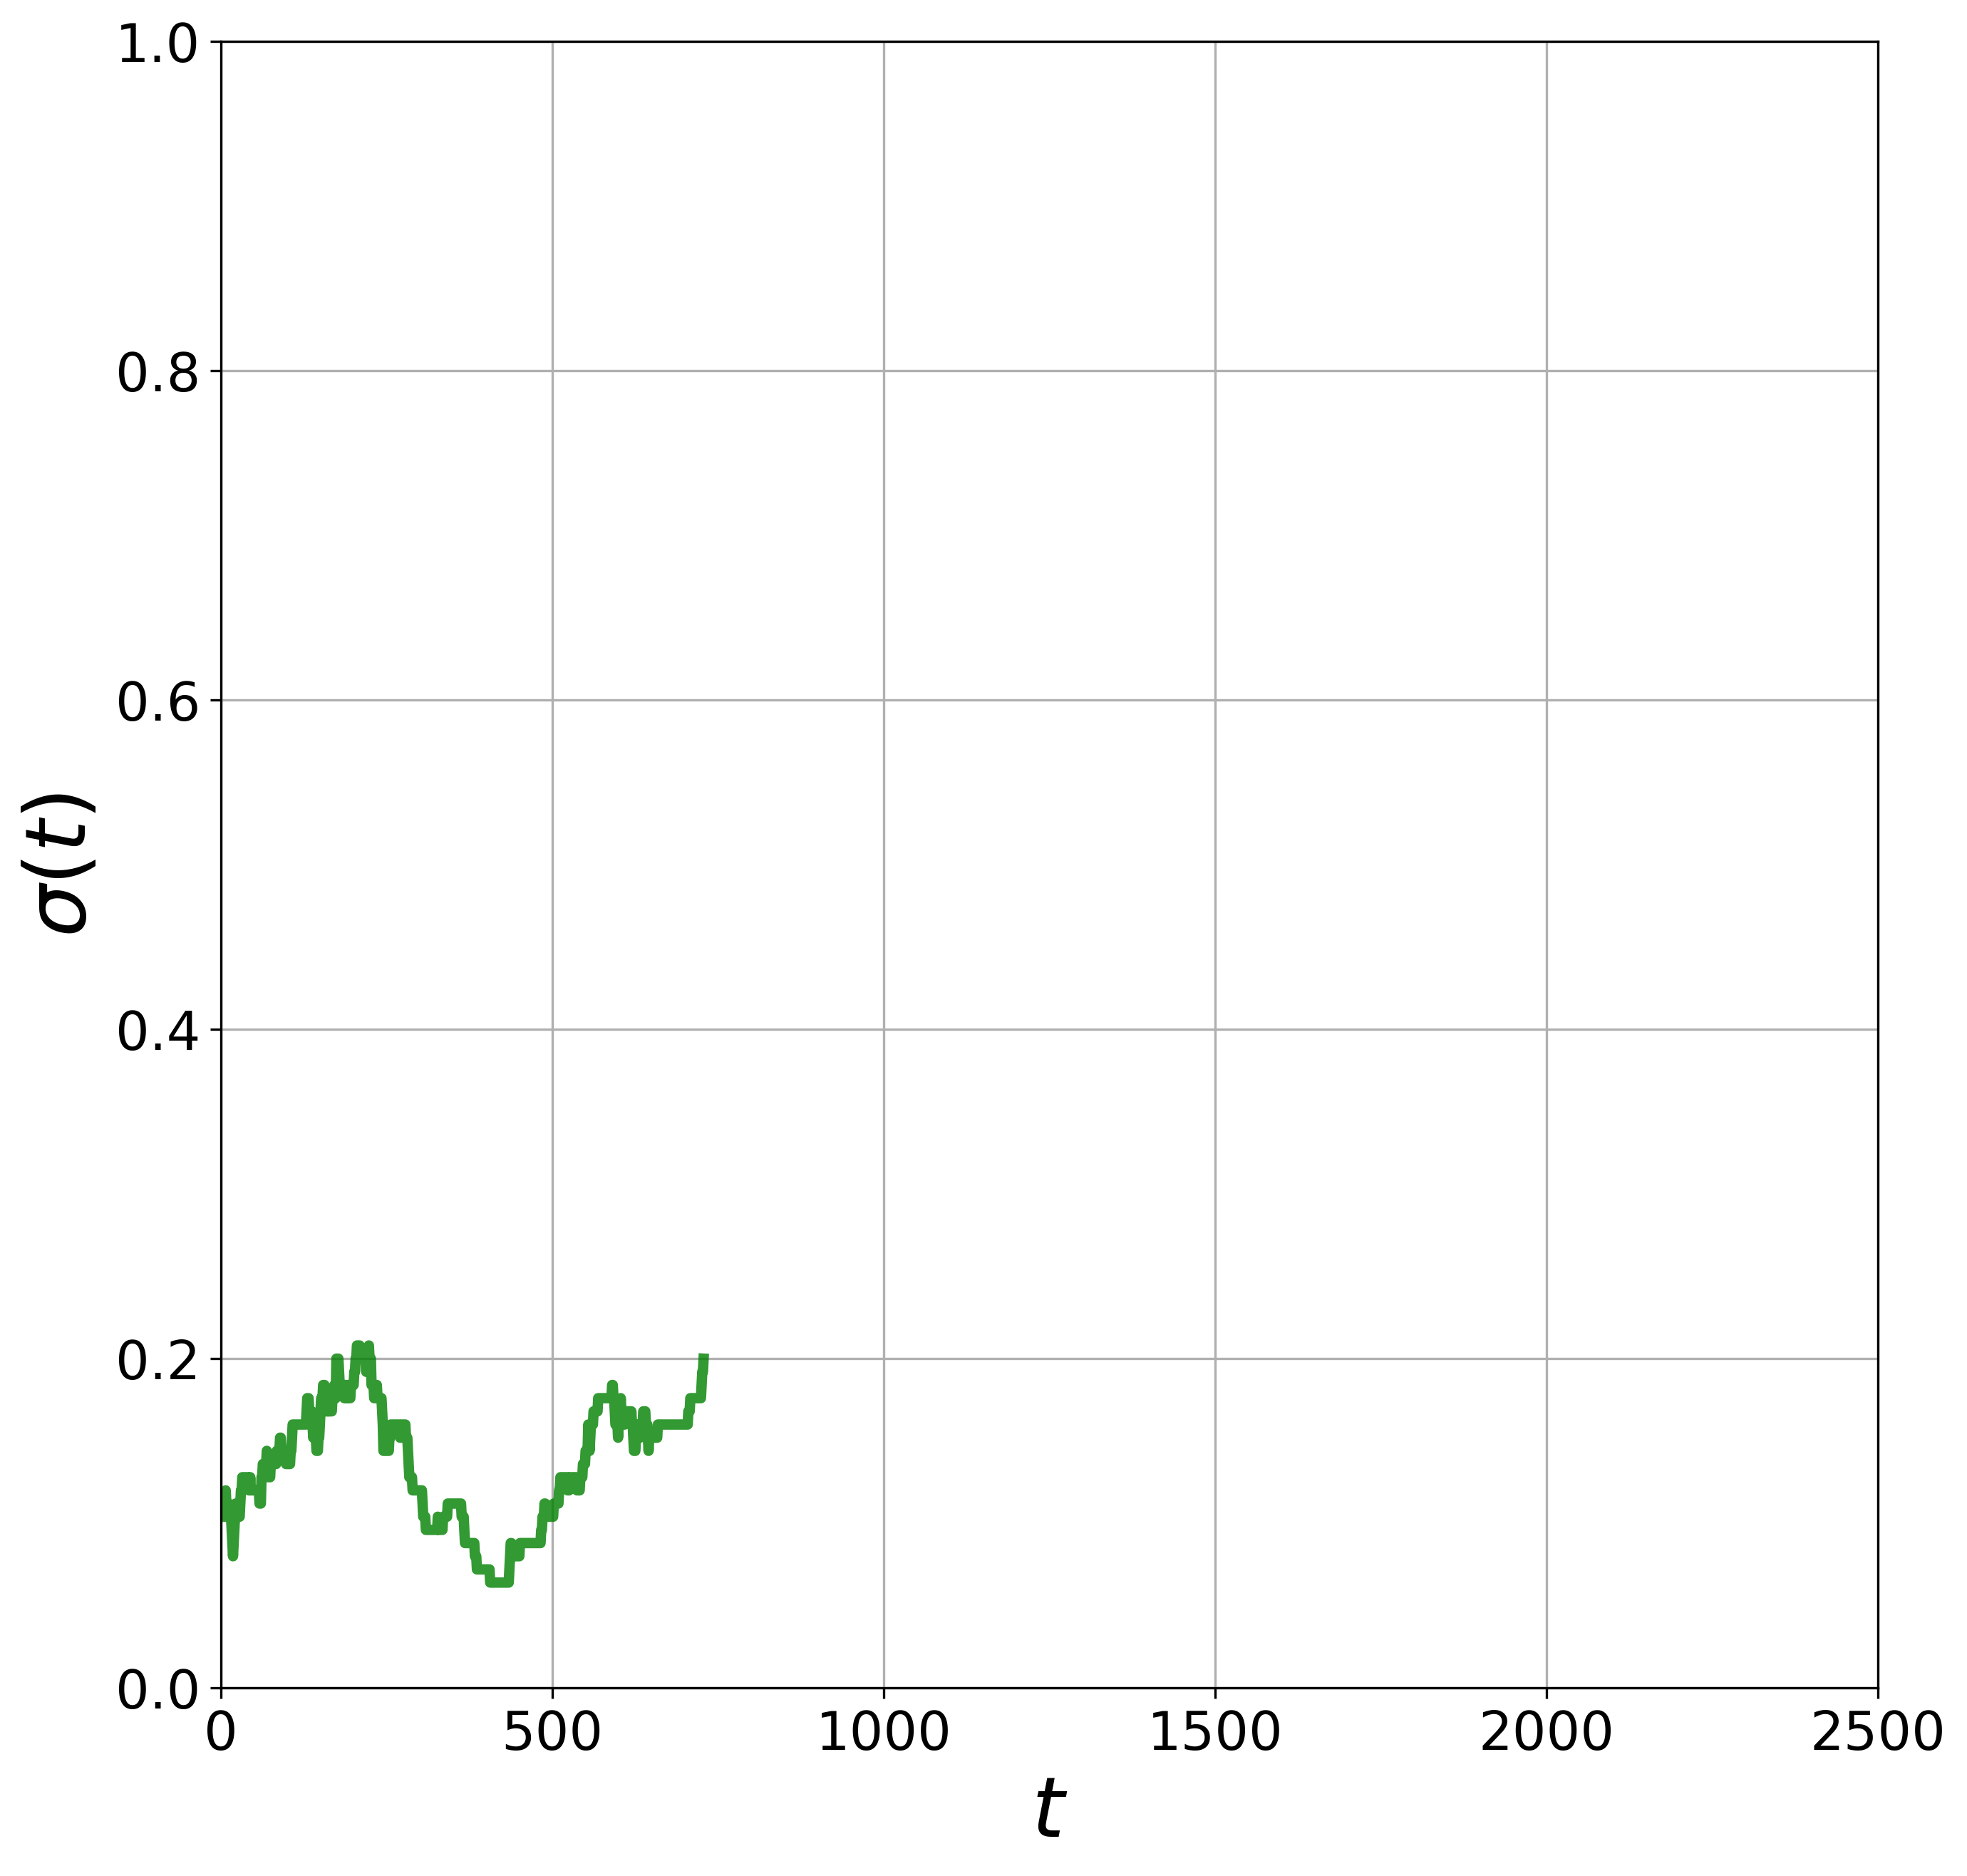

In [30]:
display(splot.fig)

### Save

In [31]:
splot.fig.savefig(
    os.path.join('plots', fname),
    bbox_inches='tight',
    pad_inches=0
)

## Animate

In [7]:
sdir = SimulationDirectory("output\\2024.04.30_17.27.18_linear_roc(k=5,l=5)_static")
sr = read_pickled('0', path=sdir.path)
animate(
    sdir.sim,
    sr,
    filename='test',
    path=sdir.path,
    t_start=max(0, sr.t - 1000),
    t_end=sr.t,
    overwrite=True
)

Converting fig2img: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.81it/s]
